In [4]:
from sklearn.metrics import precision_recall_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from src.preprocessing.utils_preprocessing import PreProcessingPipe
import pickle

mpl.rcParams["figure.dpi"] = 200

In [3]:
# data
fraud_df = pd.read_csv("data/second-eda-output.csv")
fraud_df["day_of_month"] = fraud_df["day_of_month"].astype(str)

# Pre-processing Pipeline
pre_processing_pipe = PreProcessingPipe(dataset=fraud_df)
pre_processing_pipe.train_test_splitting(
    sample_test_size=0.40, to_drop=["is_fraud"]
)
pre_processing_pipe.one_hot_encoder(["day_of_month", "type"])

# x_test and y_test
x_test = pre_processing_pipe.X_test
y_test = pre_processing_pipe.y_test


<AxesSubplot:>

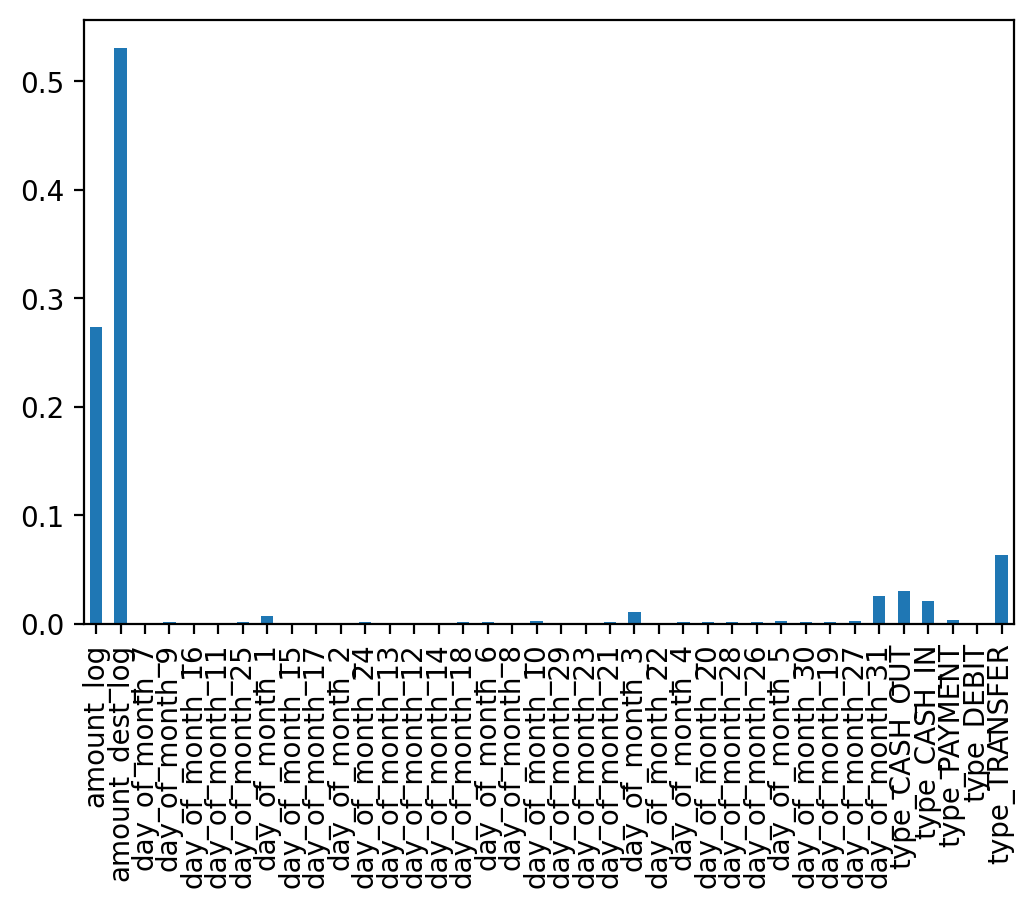

In [11]:
with open("models/21_01_22_lr_w_v3.sav", "rb") as f:
    model = pickle.load(f)

feature_names = x_test.columns
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

forest_importances.plot.bar()

In [10]:
x_test

,amount_log,amount_dest_log,day_of_month_7,day_of_month_9,day_of_month_16,day_of_month_11,day_of_month_25,day_of_month_1,day_of_month_15,day_of_month_17,...,day_of_month_5,day_of_month_30,day_of_month_19,day_of_month_27,day_of_month_31,type_CASH_OUT,type_CASH_IN,type_PAYMENT,type_DEBIT,type_TRANSFER
6351923,12.468406,9.077967,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4958954,12.477169,12.477169,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2565225,13.062532,13.062532,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3456717,8.666616,0.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1424294,11.512606,11.979958,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699460,6.839316,0.000000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5514245,10.976880,10.976880,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6082646,8.717278,8.717278,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23668,12.406850,9.902387,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


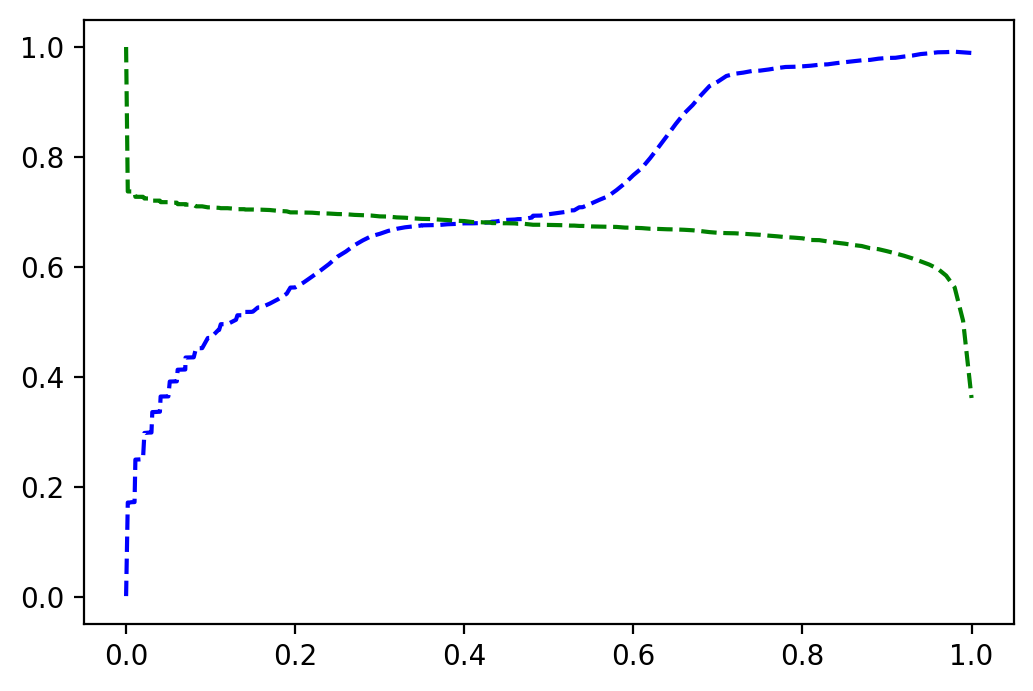

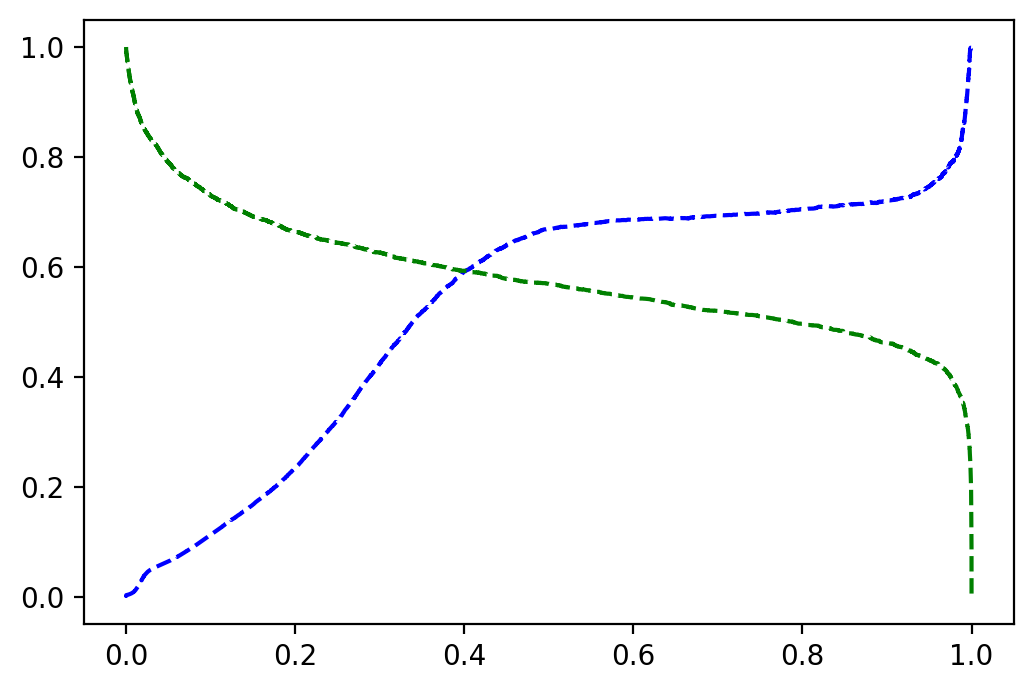

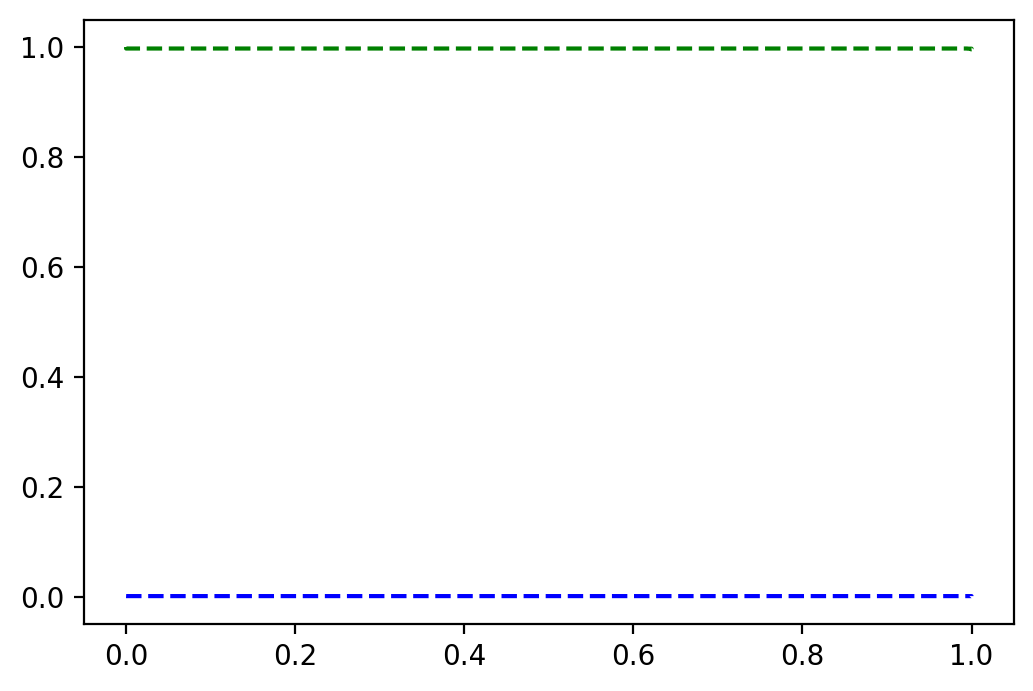

In [8]:
# model and predictions
model_path = ["models/21_01_22_lr_w_v3.sav", "models/21_01_22_lr_w_v1.sav", "models/19_01_22_lr_v1.sav"]

for model in model_path:
    with open(model, "rb") as f:
            model = pickle.load(f)

    y_hat_prob = model.predict_proba(x_test)
    precisions, recalls, thresholds = precision_recall_curve(probas_pred=y_hat_prob[:, 1], y_true=y_test["is_fraud"].values)
    plt.plot(thresholds, precisions[:-1], 'b--', label="precision")
    plt.plot(thresholds, recalls[:-1], 'g--', label="Recall")
    plt.show()